# K-Means Clustering Example
Vamos criar alguns dados falsos que incluam pessoas agrupadas por renda e idade, aleatoriamente:

In [1]:
from numpy import random, array

# Função para criar dados agrupados (clusters) de renda/idade para N pessoas em k clusters
def createClusteredData(N, k):
    random.seed(10)  # Define uma semente para garantir que os números aleatórios gerados sejam reproduzíveis
    pointsPerCluster = float(N) / k  # Calcula quantos pontos de dados (pessoas) haverá por cluster
    X = []  # Inicializa a lista que armazenará os dados

    # Loop para gerar k clusters
    for i in range(k):
        # Define um centróide aleatório de renda (incomeCentroid) para cada cluster
        incomeCentroid = random.uniform(20000.0, 200000.0)  # Gera um valor aleatório de renda entre 20.000 e 200.000
        # Define um centróide aleatório de idade (ageCentroid) para cada cluster
        ageCentroid = random.uniform(20.0, 70.0)  # Gera um valor aleatório de idade entre 20 e 70 anos

        # Loop para gerar os pontos de dados para cada cluster
        for j in range(int(pointsPerCluster)):
            # Adiciona à lista X um ponto com renda e idade gerados com base nos centróides
            # A renda é gerada com uma distribuição normal ao redor do centróide de renda, com desvio padrão de 10.000
            # A idade é gerada com uma distribuição normal ao redor do centróide de idade, com desvio padrão de 2 anos
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    
    # Converte a lista X para um array numpy
    X = array(X)
    return X  # Retorna os dados gerados


Usaremos k-means para redescobrir esses clusters na aprendizagem não supervisionada:

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0 0 4 4 4]


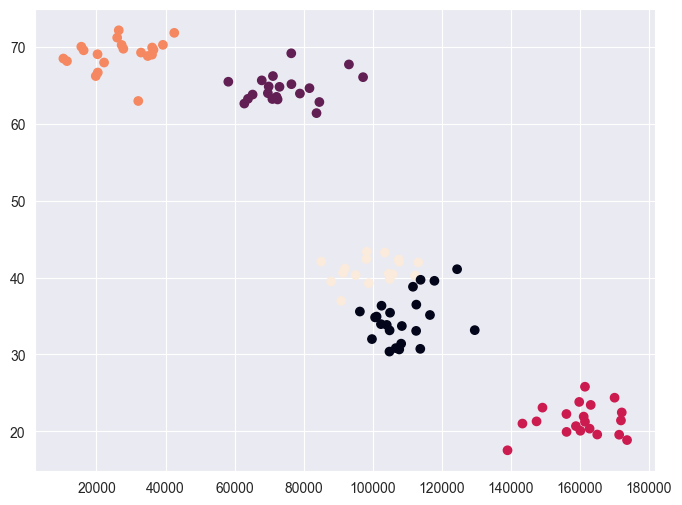

In [2]:
# Importando matplotlib para visualização
# Isso garante que os gráficos sejam exibidos diretamente no notebook
%matplotlib inline
from sklearn.cluster import KMeans  # Importa o algoritmo KMeans para agrupamento
import matplotlib.pyplot as plt  # Importa matplotlib para visualização de gráficos
from sklearn.preprocessing import scale  # Importa scale para normalizar os dados
from numpy import random  # Importa funções aleatórias do Numpy

# Gerando dados simulados com 100 pontos de dados agrupados em 5 clusters
data = createClusteredData(100, 5)

# Inicializando o modelo KMeans com 5 clusters
model = KMeans(n_clusters=5)

# Ajustando o modelo aos dados normalizados.
# Estou escalando (normalizando) os dados, o que é importante para obter bons resultados,
# pois evita que uma característica (idade ou renda) tenha muito mais influência no agrupamento.
model = model.fit(scale(data))

# Podemos olhar para os clusters aos quais cada ponto de dado foi atribuído
print(model.labels_)  # Imprime os rótulos (labels) dos clusters para cada ponto de dado

# E agora vamos visualizar os clusters
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
# Cria o gráfico de dispersão, onde a cor (c) representa o cluster atribuído a cada ponto
plt.scatter(x=data[:, 0], y=data[:, 1], c=model.labels_.astype(float))  # Usamos as colunas 0 (renda) e 1 (idade) como eixos x e y
plt.show()  # Exibe o gráfico


## Activity
Coisas para brincar: o que acontece se você não dimensionar os dados? O que acontece se você escolher valores diferentes de K? No mundo real, você não saberá o valor "certo" de K para começar - você mesmo precisará convergir para ele.

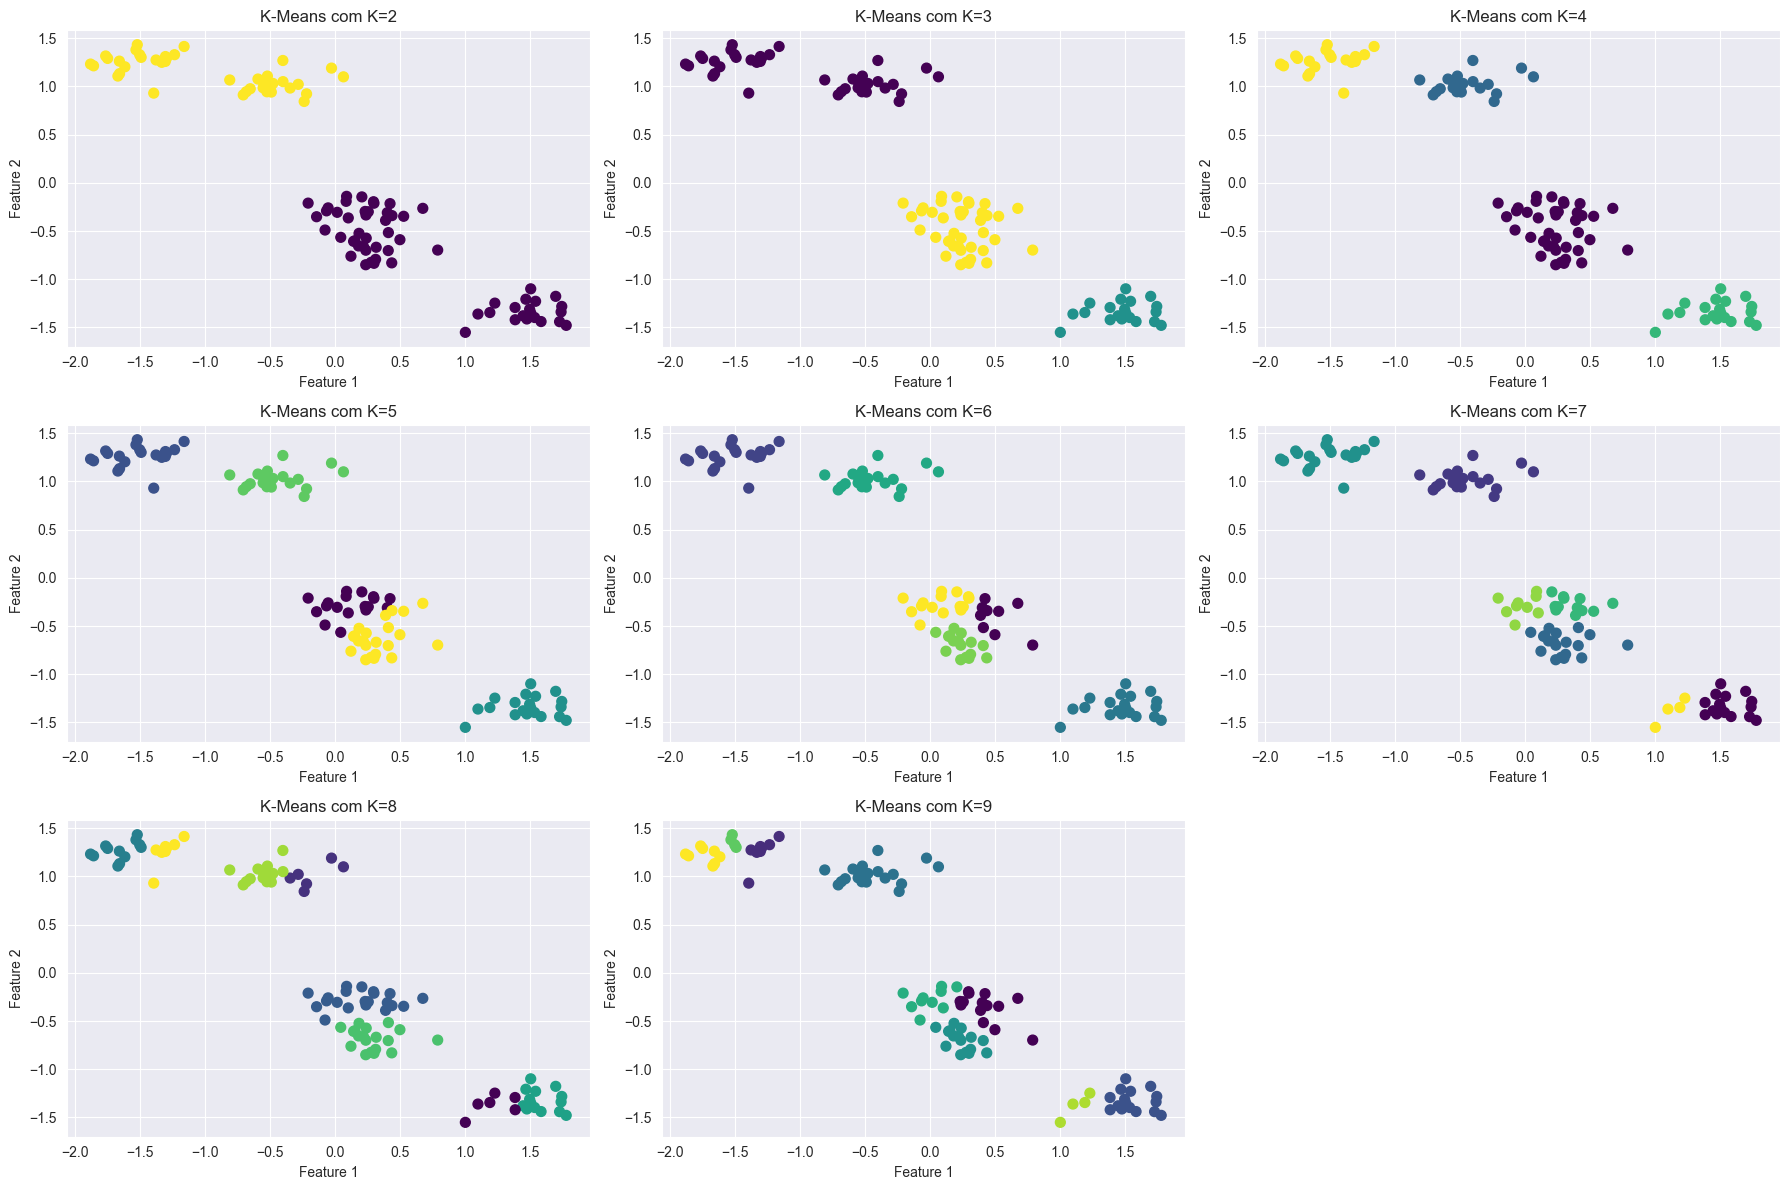

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# Função para criar dados agrupados (100 pontos, 5 clusters)
data = createClusteredData(100, 5)

# Normalizamos os dados
scaled_data = scale(data)

# Testar diferentes valores de K (número de clusters)
k_values = [2, 3, 4, 5, 6, 7, 8, 9]

# Tamanho do gráfico
plt.figure(figsize=(18, 12))

# Loop para ajustar o modelo KMeans e criar subgráficos para diferentes valores de K
for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    
    # Labels (grupos atribuídos a cada ponto)
    labels = kmeans.labels_
    
    # Gráfico de dispersão com os clusters
    plt.subplot(3, 3, i)  # Organiza os gráficos em uma grade de 3x3
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels.astype(float), cmap='viridis', s=50)
    plt.title(f'K-Means com K={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Ajustar espaçamento e exibir os gráficos
plt.tight_layout()
plt.show()


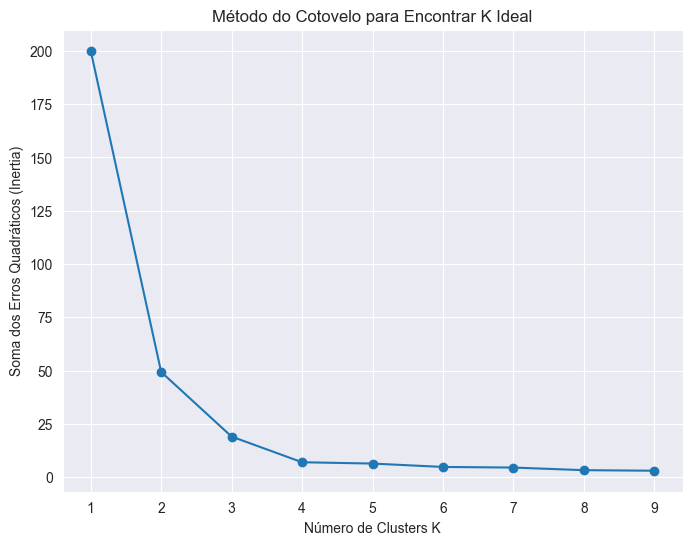

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Função para criar dados agrupados (100 pontos, 5 clusters)
data = createClusteredData(100, 5)

# Normalizamos os dados antes de aplicar o K-Means.
# A normalização garante que as variáveis estejam na mesma escala.
scaled_data = scale(data)

# Lista para armazenar a soma dos erros quadráticos (SSE) para cada valor de K.
sse = []

# Escolhemos testar valores de K variando de 1 a 10.
k_values = range(1, 10)

# Loop sobre diferentes valores de K
for k in k_values:
    # Instancia o modelo K-Means com K clusters
    kmeans = KMeans(n_clusters=k)
    
    # Ajusta o modelo aos dados normalizados
    kmeans.fit(scaled_data)
    
    # Armazena a "inertia", que é a soma dos erros quadráticos (SSE)
    # A inércia representa a soma das distâncias ao quadrado de cada ponto ao seu centróide mais próximo
    sse.append(kmeans.inertia_)

# Cria um gráfico para visualizar o Método do Cotovelo
plt.figure(figsize=(8, 6))

# Plota os valores de K no eixo x e a soma dos erros quadráticos (SSE) no eixo y
plt.plot(k_values, sse, marker='o')

# Adiciona rótulos aos eixos e ao título do gráfico
plt.xlabel('Número de Clusters K')
plt.ylabel('Soma dos Erros Quadráticos (Inertia)')
plt.title('Método do Cotovelo para Encontrar K Ideal')

# Exibe o gráfico
plt.show()


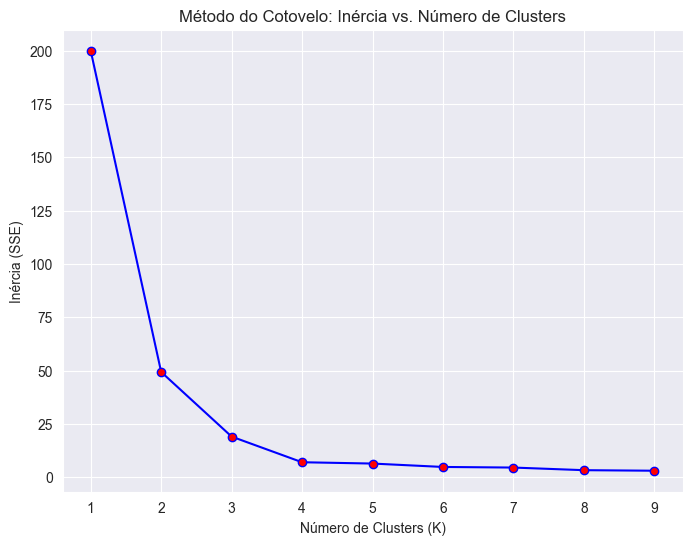

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Função para criar dados agrupados (100 pontos, 5 clusters)
data = createClusteredData(100, 5)

# Normalizamos os dados
scaled_data = scale(data)

# Lista para armazenar a inércia para cada valor de K
inertia_values = []

# Testar diferentes valores de K (número de clusters)
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    # Armazenar a inércia (SSE) para cada modelo
    inertia_values.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bo-', markerfacecolor='r')
plt.title('Método do Cotovelo: Inércia vs. Número de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (SSE)')
plt.grid(True)
plt.show()


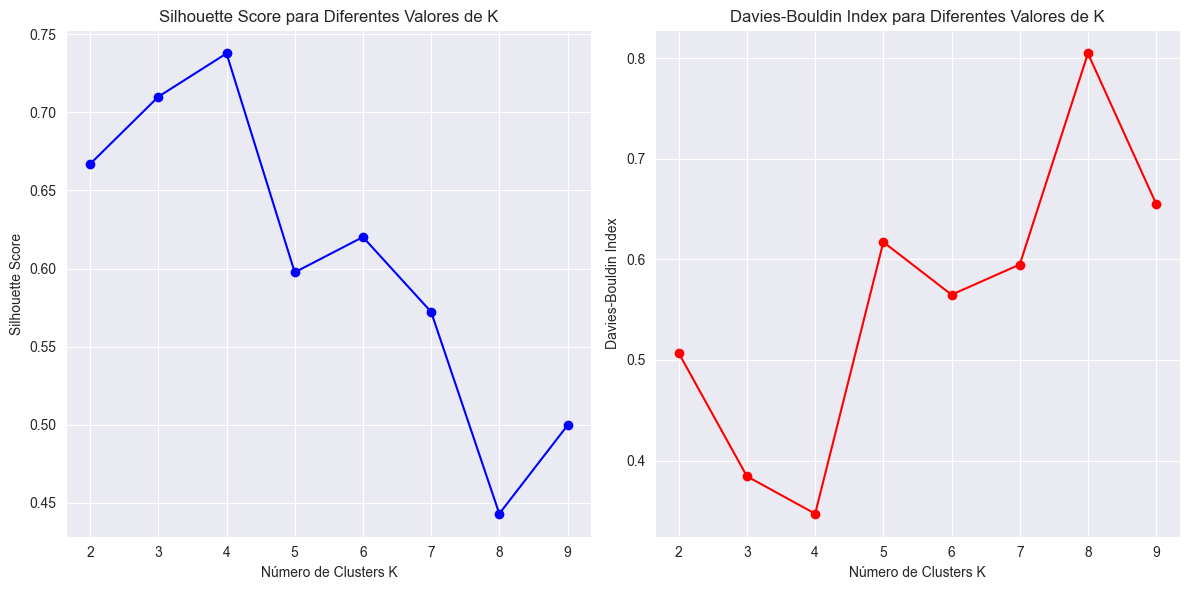

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Função para criar dados agrupados (100 pontos, 5 clusters)
data = createClusteredData(100, 5)

# Normalizamos os dados
scaled_data = scale(data)

# Testar diferentes valores de K (número de clusters)
k_values = range(2, 10)

# Listas para armazenar as métricas de avaliação
silhouette_scores = []
davies_bouldin_scores = []

# Loop para ajustar o modelo KMeans para diferentes valores de K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    
    # Labels (grupos atribuídos a cada ponto)
    labels = kmeans.labels_
    
    # Calcular o Silhouette Score (quanto maior, melhor)
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)
    
    # Calcular o Davies-Bouldin Index (quanto menor, melhor)
    davies_bouldin_avg = davies_bouldin_score(scaled_data, labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Gráfico para visualizar o Silhouette Score e o Davies-Bouldin Index para diferentes valores de K
plt.figure(figsize=(12, 6))

# Plotar o Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score para Diferentes Valores de K')
plt.xlabel('Número de Clusters K')
plt.ylabel('Silhouette Score')

# Plotar o Davies-Bouldin Index
plt.subplot(1, 2, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o', color='r')
plt.title('Davies-Bouldin Index para Diferentes Valores de K')
plt.xlabel('Número de Clusters K')
plt.ylabel('Davies-Bouldin Index')

# Exibir os gráficos
plt.tight_layout()
plt.show()
